In this Notebook, we go through some differential equation examples and how to solve them using neural networks

# First order ODE:

First Order ODE is defined in the form as:
\begin{equation}
    \frac{dy}{dx} + p(x)\cdot y = f(x)
\end{equation}

Where $x$ is defined between $0$ and $1$
\begin{equation}
    x \; \in \; [0, 1]
\end{equation}

And the boundary conidtion at 0:
\begin{equation}
    y(0) = A
\end{equation}

where $A$ is constant

# Solving ODE:

Finding the solution for the differential equation is the same as minimizing loss function ($min\{\mathcal{L} \}$), where the loss function is defined as:

\begin{equation}
    \mathcal{L} = \int_0^1 \left(\frac{d y}{dx} - f(x)\right)^2 dx
\end{equation}

# Neural Networks

\begin{equation}
    y \approx \mathcal{N}(x)
\end{equation}

Loss function:

\begin{equation}   
    MSE = MSE_f + MSE_u
\end{equation}

where the loss of the function is

\begin{equation}
    MSE_f = \frac{1}{N_f} \sum_{i=1}^{N_f} (\frac{d \mathcal{N}(x)}{dx}|_{x = x_i} - f(x_i))^2
\end{equation}

and the loss of the boundary conditions

\begin{equation}
    MSE_u = \frac{1}{N_u} \sum_{i=1}^{N_u} (\mathcal{N}(x_i) - y(x_i))^2
\end{equation}


## Building Neural Network 

In [3]:
import torch
import torch.nn as nn
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer = nn.Linear(1, 10)
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x):
        layer_out = torch.sigmoid(self.hidden_layer(x))
        output = self.output_layer(layer_out)
        return output

In [4]:
model = ANN()
model

ANN(
  (hidden_layer): Linear(in_features=1, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
)

In [5]:
params = [p.numel() for p in model.parameters()]
params

[10, 10, 10, 1]

## Example Function and BC

\begin{equation}
    \begin{cases}
      f(x) = e^x\\
      p(x) = 0
    \end{cases}\,.
\end{equation}

\begin{equation}
    y(0) = 1
\end{equation}


### Exact Solution

\begin{equation}
    y = e^x
\end{equation}

In [6]:
model = ANN()
optimizer = torch.optim.LBFGS(model.parameters())

def exact_func(x):
    return torch.exp(x)

def f(x):
    return torch.exp(x)

def loss(model, x):
    x.requires_grad = True
    y = model(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    MSEf = torch.mean((dy_dx - f(x))**2)  #MSEf as defined above
    bc = (y[0, 0] - 1.)**2 #MSEu as defined above
    return MSEf + bc

# build random data points
x = torch.linspace(0, 1, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(model, x)
    l.backward()
    return l

epochs = 10
for i in range(epochs):
    print("Epoch", str(i+1),", Loss: ",  loss(model, x).item())
    optimizer.step(closure)

print("Final Loss: ", loss(model, x).item())

Epoch 1 , Loss:  3.6725339889526367
Epoch 2 , Loss:  0.00011619881115620956
Epoch 3 , Loss:  1.5026246273919242e-06
Epoch 4 , Loss:  1.118040927394759e-06
Epoch 5 , Loss:  1.118040927394759e-06
Epoch 6 , Loss:  1.118040927394759e-06
Epoch 7 , Loss:  1.118040927394759e-06
Epoch 8 , Loss:  1.118040927394759e-06
Epoch 9 , Loss:  1.118040927394759e-06
Epoch 10 , Loss:  1.118040927394759e-06
Final Loss:  1.118040927394759e-06


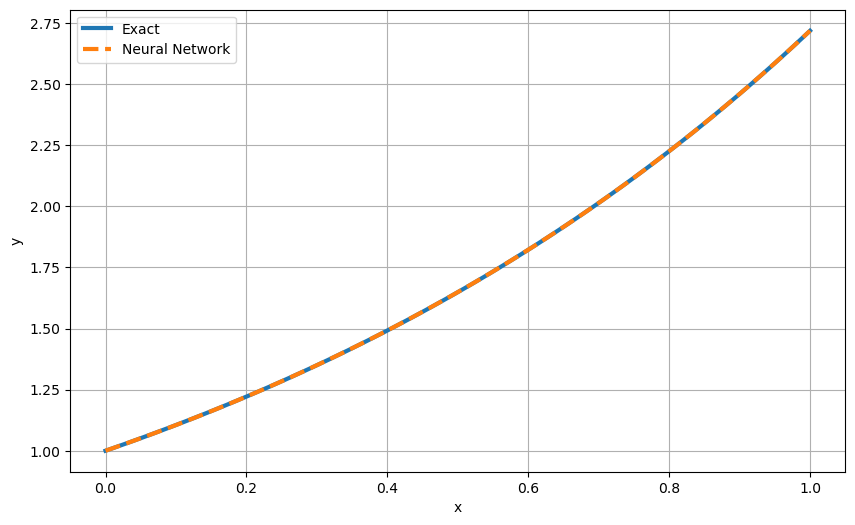

In [18]:
import matplotlib.pyplot as plt

xtest = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    ypred = model(xtest)

plt.figure(figsize=(10, 6))
plt.plot(xtest, exact_func(xtest), label="Exact", linewidth=3.0)
plt.plot(xtest, ypred, "--" ,label="Neural Network" , linewidth=3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.savefig("report_modeling2.pdf", bbox_inches='tight')
plt.show()

## Second Order ODE

\begin{equation}
    \begin{cases}
      y"(x) - y(x) - 3y^2(x) = 0\\
      y(x) = -1\\
      y´(x) = -1/2
    \end{cases}\,.
\end{equation}

The analystical Solution is 
\begin{equation}
    \begin{cases}
      y(x) = -1/2.sech^2(x/2)
    \end{cases}\,.
\end{equation}

In [195]:
model = ANN()
optimizer = torch.optim.LBFGS(model.parameters())


def f(x):
    return 


def exact_func(x):
    return torch.cos(x)


def loss(model, x):
    x.requires_grad = True
    y = model(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    y_double_prime = torch.autograd.grad(dy_dx.sum(), x, create_graph=True)[0]

    MSEf = torch.mean((y_double_prime + y)**2) #MSEf
    bc1 = (y[0, 0] - 1.)**2 #MSEu1
    bc2 = (dy_dx[0, 0] - 0.)**2 #MSEu2
    return  MSEf + bc1 + bc2


# Build some random data points
x = torch.linspace(0, 8, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(model, x)
    l.backward()
    return l

epochs = 20
for i in range(epochs):
    print("Epoch", str(i+1),", Loss: ",  loss(model, x).item())
    optimizer.step(closure)
    
print("Final Loss: ", loss(model, x).item())

Epoch 1 , Loss:  1.8242359161376953
Epoch 2 , Loss:  0.7249821424484253
Epoch 3 , Loss:  0.05159441754221916
Epoch 4 , Loss:  0.036345481872558594
Epoch 5 , Loss:  0.029835905879735947
Epoch 6 , Loss:  0.02719329483807087
Epoch 7 , Loss:  0.02306443639099598
Epoch 8 , Loss:  0.014602873474359512
Epoch 9 , Loss:  0.002056197030469775
Epoch 10 , Loss:  0.001143192988820374
Epoch 11 , Loss:  0.0005703810602426529
Epoch 12 , Loss:  0.0002759041672106832
Epoch 13 , Loss:  0.00014325401571113616
Epoch 14 , Loss:  8.61898297443986e-05
Epoch 15 , Loss:  0.00022189482115209103
Epoch 16 , Loss:  5.0692749937297776e-05
Epoch 17 , Loss:  4.441860073711723e-05
Epoch 18 , Loss:  4.163314224570058e-05
Epoch 19 , Loss:  85.59851837158203
Epoch 20 , Loss:  2.855286220437847e-05
Final Loss:  2.1762663891422562e-05


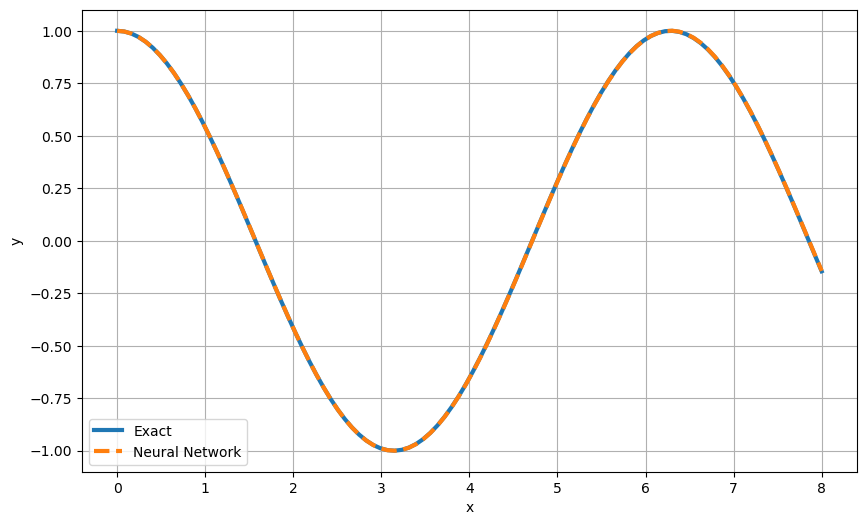

In [196]:
import matplotlib.pyplot as plt

xtest = torch.linspace(0, 8, 100)[:, None]
with torch.no_grad():
    ypred = model(xtest)

plt.figure(figsize=(10, 6))
plt.plot(xtest, exact_func(xtest), label="Exact", linewidth=3.0)
plt.plot(xtest, ypred, "--" ,label="Neural Network" , linewidth=3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.savefig("report_modeling10.pdf", bbox_inches='tight')
plt.show()

In [218]:
model = ANN()
optimizer = torch.optim.LBFGS(model.parameters())


def f(x):
    return 
import numpy as np

# Build some random data points
x = torch.linspace(-5, 5, 100)[:, None]

def exact_func(x):
    return -0.5*(1/torch.cosh(x/2)**2)

def loss(model, x):
    x.requires_grad = True
    y = model(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    y_double_prime = torch.autograd.grad(dy_dx.sum(), x, create_graph=True)[0]

    MSEf = torch.mean(((y_double_prime - y - 3.0*(y**2))**2)) #MSEf
    bc1 = (y[int(y.shape[0]/2)-1, 0] + 0.5)**2 #MSEu1
    bc2 = (dy_dx[int(y.shape[0]/2)-1, 0] - 0)**2 #MSEu2
    return  MSEf + bc1 + bc2


def closure():
    optimizer.zero_grad()
    l = loss(model, x)
    l.backward()
    return l

epochs = 10
for i in range(epochs):
    print("Epoch", str(i+1),", Loss: ",  loss(model, x).item())
    optimizer.step(closure)
    
print("Final Loss: ", loss(model, x).item())

Epoch 1 , Loss:  2.18302059173584
Epoch 2 , Loss:  0.004405810963362455
Epoch 3 , Loss:  6.25612010480836e-05
Epoch 4 , Loss:  7.417506367346505e-06
Epoch 5 , Loss:  5.230451733950758e-06
Epoch 6 , Loss:  1.5874553582762019e-06
Epoch 7 , Loss:  5.029904741604696e-07
Epoch 8 , Loss:  3.849645224818232e-07
Epoch 9 , Loss:  1.906220035152728e-07
Epoch 10 , Loss:  1.63967172284174e-07
Final Loss:  1.63967172284174e-07


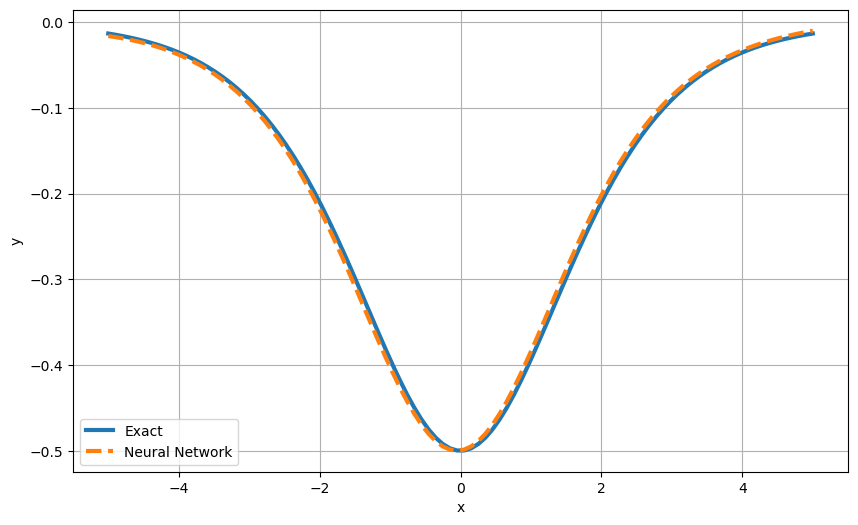

In [219]:
import matplotlib.pyplot as plt

xtest = torch.linspace(-5, 5, 100)[:, None]
with torch.no_grad():
    ypred = model(xtest)

plt.figure(figsize=(10, 6))
plt.plot(xtest, exact_func(xtest), label="Exact", linewidth=3.0)
plt.plot(xtest, ypred, "--" ,label="Neural Network" , linewidth=3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.savefig("report_modeling10.pdf", bbox_inches='tight')
plt.show()

# Second order ODE:

\begin{equation}
    \frac{d^2 y}{dx^2} + p(x) \frac{dy}{dx} + q(x) y = f(x)
\end{equation}

\begin{equation}
    x \; \in \; [0, 1]
\end{equation}

\begin{equation}
    y(0) = A
\end{equation}

\begin{equation}
    y(1) = B
\end{equation}

## Example Function and BC

\begin{equation}
    \begin{cases}
      p(x) = 0\\
      q(x) = 0\\
      f(x) = -1
    \end{cases}\,.
\end{equation}

\begin{equation}
    \begin{cases}
      y(0) = 0\\
      y(1) = 0
    \end{cases}\,.
\end{equation}

### Exact Solution

\begin{equation}
    y(x) = - \frac{1}{2}x^2 + \frac{1}{2}x
\end{equation}

In [220]:
model = ANN()
optimizer = torch.optim.LBFGS(model.parameters())


def f(x):
    return -torch.ones(x.shape[0], x.shape[1])


def exact_func(x):
    return -0.5*torch.pow(x, 2) + 0.5*x


def loss(model, x):
    x.requires_grad = True
    y = model(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    y_double_prime = torch.autograd.grad(dy_dx.sum(), x, create_graph=True)[0]
    
    MSEf = torch.mean((y_double_prime - f(x))**2) #MSEf
    bc1 = 0.5*(y[0, 0] - 0.)**2 #MSEu1
    bc2 = 0.5*(y[-1, 0] - 0.)**2 #MSEu2
    return  MSEf + bc1 + bc2


# Build some random data points
x = torch.linspace(0, 1, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(model, x)
    l.backward()
    return l

epochs = 10
for i in range(epochs):
    print("Epoch", str(i+1),", Loss: ",  loss(model, x).item())
    optimizer.step(closure)
    
print("Final Loss: ", loss(model, x).item())

Epoch 1 , Loss:  1.0867021083831787
Epoch 2 , Loss:  0.005088435020297766
Epoch 3 , Loss:  7.282818842213601e-05
Epoch 4 , Loss:  1.7394349924870767e-05
Epoch 5 , Loss:  1.033015450957464e-05
Epoch 6 , Loss:  5.87402928431402e-06
Epoch 7 , Loss:  3.760931804208667e-06
Epoch 8 , Loss:  1.9212354800401954e-06
Epoch 9 , Loss:  6.579751925528399e-07
Epoch 10 , Loss:  4.373448803107749e-07
Final Loss:  3.041797072000918e-07


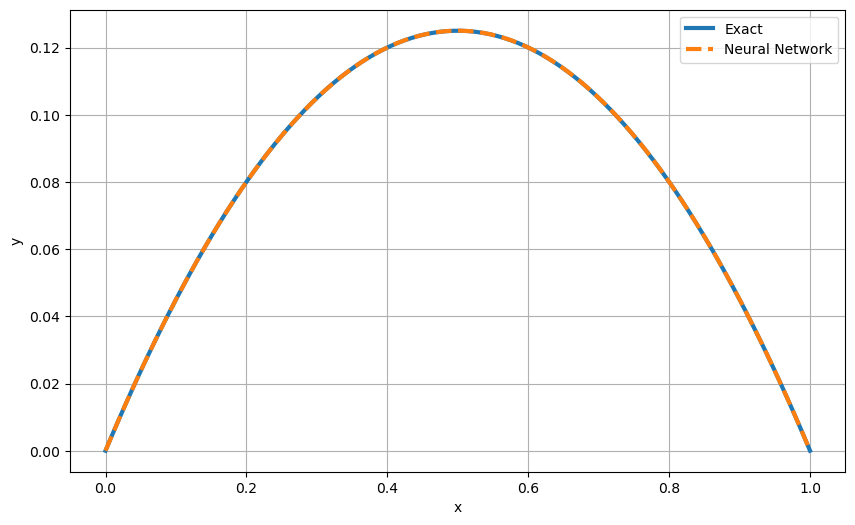

In [221]:
import matplotlib.pyplot as plt

xtest = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    ypred = model(xtest)

plt.figure(figsize=(10, 6))
plt.plot(xtest, exact_func(xtest), label="Exact", linewidth=3.0)
plt.plot(xtest, ypred, "--" ,label="Neural Network" , linewidth=3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.savefig("report_modeling10.pdf", bbox_inches='tight')
plt.show()

Sources: https://www.sciencedirect.com/science/article/pii/S0021999118307125

## Exponnetial Decay

An exponential decay of a quantity $g(x)$ is described by the equation

$$
 g'(x) = -\gamma g(x)
$$


with $g(0) = g_0$ for some chosen initial value $g_0$.

The exact solution of exponential growth equation is

$$
g(x) = g_0 \exp\left(-\gamma x\right)
$$


Where (example) $\gamma = 2$ and $g0 = 10$ (This can change)

We can notice that BC1 is $g(0) = g_0$

We can build two losses here: first loss is MSEf is the loss of the quation 

$$
g'(x) = -\gamma g(x)
$$

Where we minimize the differnece between the two terms

and the second loss is the boundary condition loss where  

$$
g(0) = g_0
$$


In [222]:
model = ANN()
optimizer = torch.optim.LBFGS(model.parameters())

def exact_func(x, g0=10, gamma=2):
    return g0*torch.exp(-gamma*x)

def loss(model, x):
    g0 = 10
    gamma = 2
    x.requires_grad = True
    y = model(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    
    MSEf = torch.mean((dy_dx + gamma * y)**2) #MSEf
    bc1 = (y[0, 0] - g0)**2 #MSEu1
    return  MSEf + bc1

# Build some random data points
x = torch.linspace(0, 1, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(model, x)
    l.backward()
    return l

epochs = 10
for i in range(epochs):
    print("Epoch", str(i+1),", Loss: ",  loss(model, x).item())
    optimizer.step(closure)
    
print("Final Loss: ", loss(model, x).item())

Epoch 1 , Loss:  95.343994140625
Epoch 2 , Loss:  49.10111999511719
Epoch 3 , Loss:  0.005153535399585962
Epoch 4 , Loss:  0.0003302371478639543
Epoch 5 , Loss:  0.0005581722944043577
Epoch 6 , Loss:  5.724588118027896e-05
Epoch 7 , Loss:  5.231398608884774e-05
Epoch 8 , Loss:  0.00981406681239605
Epoch 9 , Loss:  6.707749435008736e-06
Epoch 10 , Loss:  6.552091235789703e-06
Final Loss:  6.552091235789703e-06


In [227]:
#forward Euler
import numpy as np
Nt = 100
g0 = 10
T = 1
t = np.linspace(0, 1, Nt)
dt = T/(Nt - 1)
alpha = 2
yeuler = np.zeros(Nt)
yeuler[0] = g0

for i in range(1, Nt):
    yeuler[i] = yeuler[i-1] - dt*(alpha*yeuler[i-1])

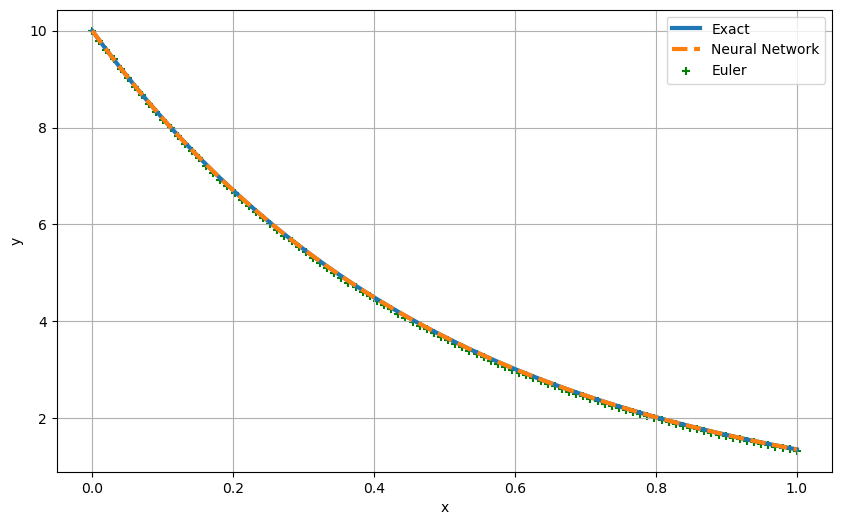

In [229]:
import matplotlib.pyplot as plt

xtest = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    ypred = model(xtest)

plt.figure(figsize=(10, 6))
plt.plot(xtest, exact_func(xtest), label="Exact", linewidth=3.0)
plt.plot(xtest, ypred, "--" ,label="Neural Network" , linewidth=3.0)
#plt.plot(xtest, yeuler , "--" , label="Euler", linewidth=3.0)
plt.scatter(xtest, yeuler, color = 'green', marker = '+', label = 'Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.savefig("report_modeling10.pdf", bbox_inches='tight')
plt.show()

In [230]:
MSE_euler = ((yeuler - exact_func(xtest).detach().numpy())**2).mean()
MSE_NN = ((ypred - exact_func(xtest).detach().numpy())**2).mean()
print("MSE between Euler and exact: ", MSE_euler)
print("MSE between NN and exact: ", MSE_NN.detach().numpy())

MSE between Euler and exact:  12.031399549321169
MSE between NN and exact:  2.1608821e-08


## Population Growth

$$
g'(t) = \alpha g(t)(A - g(t))
$$

where $g(0) = g_0$.

In this example, we let $\alpha = 2$, $A = 1$, and $g_0 = 1.2$.

Exact solution is given as:

$$
g'(t) = Ag_0/(g_0+ (A-g_0)\exp(-\alpha A x)
$$

In [231]:
model = ANN()
optimizer = torch.optim.LBFGS(model.parameters())

# Those can be changed
g0 = 1.2
alpha = 2
A = 1

def exact_func(x):
    alpha, A, g0 = 2, 1, 1.2 
    return A*g0/(g0 + (A - g0)*torch.exp(-alpha*A*x))

def loss(model, x):
    x.requires_grad = True
    y = model(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    
    MSEf = torch.mean((dy_dx - (alpha * y * (A - y)))**2) #MSEf
    bc1 = (y[0, 0] - g0)**2 #MSEu1
    return  MSEf + bc1

# Build some random data points
x = torch.linspace(0, 1, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(model, x)
    l.backward()
    return l

epochs = 10
for i in range(epochs):
    print("Epoch", str(i+1),", Loss: ",  loss(model, x).item())
    optimizer.step(closure)
    
print("Final Loss: ", loss(model, x).item())

Epoch 1 , Loss:  1.015702486038208
Epoch 2 , Loss:  0.049525778740644455
Epoch 3 , Loss:  0.0021455660462379456
Epoch 4 , Loss:  0.00014755377196706831
Epoch 5 , Loss:  7.110233468665683e-07
Epoch 6 , Loss:  3.2350379797208006e-07
Epoch 7 , Loss:  3.2350379797208006e-07
Epoch 8 , Loss:  3.2350379797208006e-07
Epoch 9 , Loss:  3.2350379797208006e-07
Epoch 10 , Loss:  3.2350379797208006e-07
Final Loss:  3.2350379797208006e-07


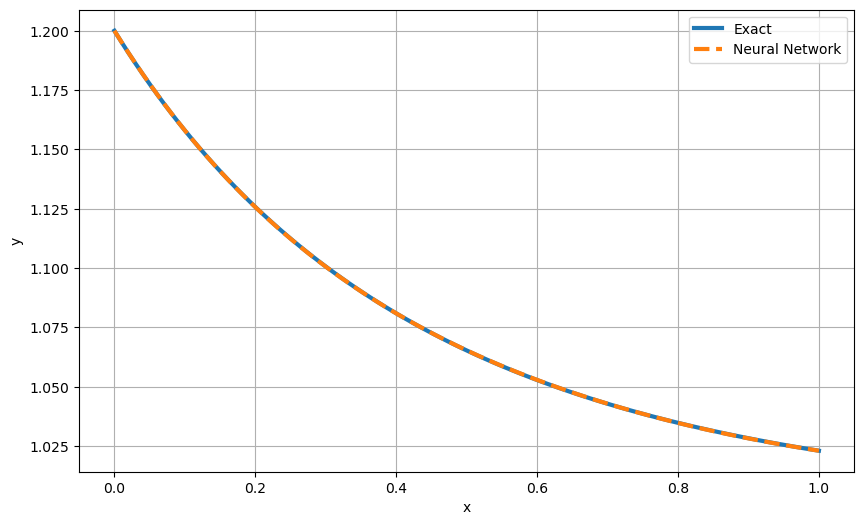

In [232]:
import matplotlib.pyplot as plt

xtest = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    ypred = model(xtest)

plt.figure(figsize=(10, 6))
plt.plot(xtest, exact_func(xtest), label="Exact", linewidth=3.0)
plt.plot(xtest, ypred, "--" ,label="Neural Network" , linewidth=3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.savefig("report_modeling10.pdf", bbox_inches='tight')
plt.show()

## Poisson equation

$$
  -g''(x) = f(x)
$$


BC1 

$$
g(0) = 0
$$

BC2

$$
g(1) = 0
$$

In [233]:
model = ANN()
optimizer = torch.optim.LBFGS(model.parameters())

# Those can be changed
g0 = 1.2
alpha = 2
A = 1

def exact_func(x):
    return x*(1-x)*torch.exp(x)

def f(x):
    return (3*x + x**2)*torch.exp(x)

def loss(model, x):
    x.requires_grad = True
    y = model(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    y_double_prime = torch.autograd.grad(dy_dx.sum(), x, create_graph=True)[0]
    
    MSEf = torch.mean((y_double_prime + f(x))**2) #MSEf
    bc1 = (y[0, 0] - 0)**2 #MSEu1
    bc2 = (y[-1, 0] - 0)**2 #MSEu2
    return  MSEf + bc1 + bc2

# Build some random data points
x = torch.linspace(0, 1, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(model, x)
    l.backward()
    return l

epochs = 9
for i in range(epochs):
    print("Epoch", str(i+1),", Loss: ",  loss(model, x).item())
    optimizer.step(closure)
    
print("Final Loss: ", loss(model, x).item())

Epoch 1 , Loss:  23.472618103027344
Epoch 2 , Loss:  0.1007831022143364
Epoch 3 , Loss:  0.0012762212427332997
Epoch 4 , Loss:  0.0002632793039083481
Epoch 5 , Loss:  5.782810694654472e-05
Epoch 6 , Loss:  7.897759132902138e-06
Epoch 7 , Loss:  7.68402242101729e-06
Epoch 8 , Loss:  7.68402242101729e-06
Epoch 9 , Loss:  7.68402242101729e-06
Final Loss:  7.68402242101729e-06


In [544]:
def f(x):
    return (3*x + x**2)*np.exp(x)

Nx = 100
x = np.linspace(0,1, Nx)
    
dx = 1/(Nx - 1)

# Set up the matrix A
A = np.zeros((Nx-2,Nx-2))

A[0,0] = 2
A[0,1] = -1

for i in range(1,Nx-3):
    A[i,i-1] = -1
    A[i,i] = 2
    A[i,i+1] = -1

A[Nx - 3, Nx - 4] = -1
A[Nx - 3, Nx - 3] = 2

# Set up the vector f
f_vec = dx**2 * f(x[1:-1])

# Solve the equation
#g_res = np.linalg.solve(A, f_vec)

#g_vec = np.zeros(Nx)
#g_vec[1:-1] = g_res

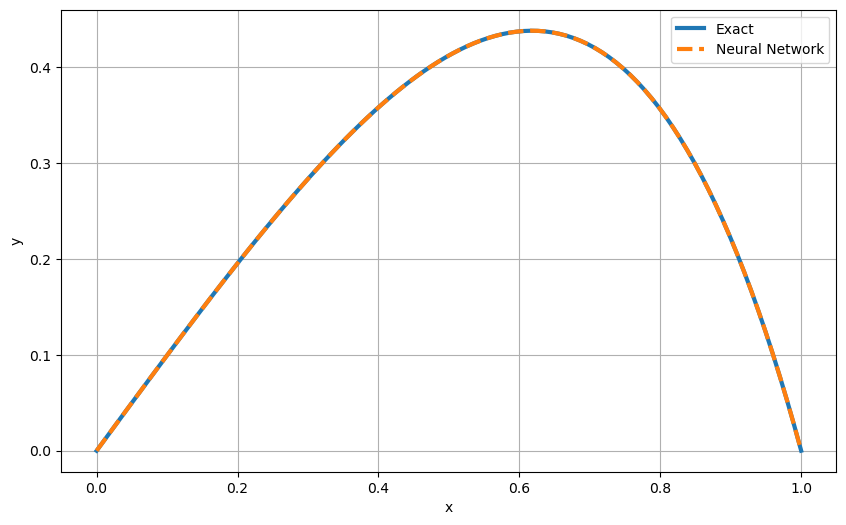

In [234]:
import matplotlib.pyplot as plt

xtest = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    ypred = model(xtest)

plt.figure(figsize=(10, 6))
plt.plot(xtest, exact_func(xtest), label="Exact", linewidth=3.0)
plt.plot(xtest, ypred, "--" ,label="Neural Network" , linewidth=3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.savefig("report_modeling10.pdf", bbox_inches='tight')
plt.show()

## Sample ODE
$$
y =−2xy
$$

Exact solution is 

$$
y(x)=exp−x^2
$$

and BC1 

$$
y(0) = 1
$$

In [235]:
model = ANN()
optimizer = torch.optim.LBFGS(model.parameters())

# Those can be changed

def exact_func(x):
    return torch.exp(-x**2)

def loss(model, x):
    x.requires_grad = True
    y = model(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    
    MSEf = torch.mean((dy_dx + 2*x*y)**2) #MSEf
    bc1 = (y[0, 0] - 1)**2 #MSEu1
    #bc2 = (y[-1, 0] - 1)**2 #MSEu1
    return  MSEf + bc1

# Build some random data points
x = torch.linspace(0, 1, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(model, x)
    l.backward()
    return l

epochs = 15
for i in range(epochs):
    print("Epoch", str(i+1),", Loss: ",  loss(model, x).item())
    optimizer.step(closure)
    
print("Final Loss: ", loss(model, x).item())

Epoch 1 , Loss:  1.5903128385543823
Epoch 2 , Loss:  0.03665173053741455
Epoch 3 , Loss:  0.009253625757992268
Epoch 4 , Loss:  0.0002938543912023306
Epoch 5 , Loss:  3.483219916233793e-05
Epoch 6 , Loss:  0.00035395275335758924
Epoch 7 , Loss:  1.4208225707079691e-07
Epoch 8 , Loss:  1.4208225707079691e-07
Epoch 9 , Loss:  1.4208225707079691e-07
Epoch 10 , Loss:  1.4208225707079691e-07
Epoch 11 , Loss:  1.4208225707079691e-07
Epoch 12 , Loss:  1.4208225707079691e-07
Epoch 13 , Loss:  1.4208225707079691e-07
Epoch 14 , Loss:  1.4208225707079691e-07
Epoch 15 , Loss:  1.4208225707079691e-07
Final Loss:  1.4208225707079691e-07


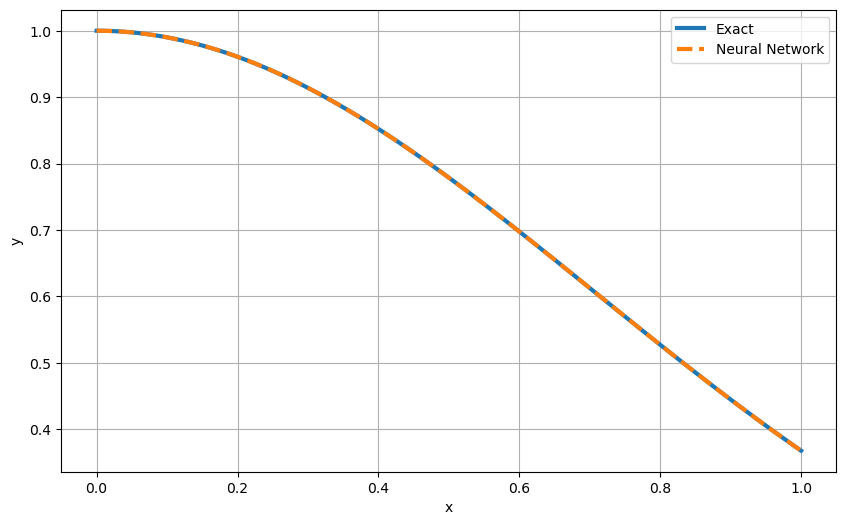

In [236]:
import matplotlib.pyplot as plt

xtest = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    ypred = model(xtest)

plt.figure(figsize=(10, 6))
plt.plot(xtest, exact_func(xtest), label="Exact", linewidth=3.0)
plt.plot(xtest, ypred, "--" ,label="Neural Network" , linewidth=3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.savefig("report_modeling10.pdf", bbox_inches='tight')
plt.show()

## References:

https://sevent-christina.medium.com/deep-learning-solves-differential-equations-better-than-any-other-numerical-method-14126c7a2a7c

https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter11.html

https://arxiv.org/pdf/2307.11237